In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch
from models import *
from tools_noniid import *
from utils import *
import json
import os
import argparse
import time
import random
import numpy as np
import copy

In [3]:
from models import convert_tnt
from models import TNT
# import 

In [4]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset_train = torchvision.datasets.CIFAR10(root='/data/datasets/cifar10',
                                             train=True, download=True,
                                             transform=transform_train)

dataset_test = torchvision.datasets.CIFAR10(root='/data/datasets/cifar10',
                                            train=False, download=True,
                                            transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainloader = DataLoader(dataset_train, batch_size=128,shuffle=False)
testloader = DataLoader(dataset_test, batch_size=128,shuffle=False)

### Saving Original normalized image and ternary image

In [6]:
# for f in os.listdir(r'C:\Users\alvin\Documents\ternay_compression\ternaryimage\ternary_image'):
#     f = os.path.join(r'C:\Users\alvin\Documents\ternay_compression\ternaryimage\ternary_image', f)
#     for file in os.listdir(f):
#         file = os.path.join(f, file)
#         os.remove(file)

In [7]:
dicti = {0:'airplane',
        1:'automobile',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck'  
}

In [8]:
inv_normalize = transforms.Normalize(
   mean=[-0.4914/0.2023, -0.4822/0.1994, -0.4465/0.2010],
   std=[1/0.2023, 1/0.1994, 1/0.2010]
)
# inv_tensor = inv_normalize(tensor)

In [10]:
from PIL import Image
from matplotlib import cm
# im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
i=0
dicti = {0:'airplane',
        1:'automobile',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck'  
}

for images, labels in (trainloader):
#     print(images[0][0])
    image = TNT.image_tnt(images)
#     print(labels[0].item())
    for idx,img in enumerate(image):
        img = inv_normalize(img)
#         print(img)
#         print(images[0][0])
#         idx_n = idx+(i*128)
        img = img.permute(1,2,0).numpy()
        im = Image.fromarray(np.uint8(img*255))
        im = im.resize((224,224))
        im.show()
        
#         images = inv_normalize(images)
#         ori = images[idx].permute(1,2,0).numpy()
#         im_ori = Image.fromarray(np.uint8(ori),'RGB')
#         im_ori = im_ori.resize((224,224))
#         im_ori.show()
#         im_ori.save(f'./ternaryimage/ternary_image/{dicti[labels[idx].item()]}/{idx_n}_ori.jpg')
# #         
#         newsize = (224, 224)
#         im1 = im.resize(newsize)
        
#         im.save(f'./ternaryimage/ternary_image/{dicti[labels[idx].item()]}/{idx_n}.jpg')
#         im1.save(f'./ternaryimage/ternary_image/{dicti[labels[idx].item()]}/{idx_n}_resized.jpg')
    i+=1

NameError: name 'idx_n' is not defined

### Checking model prediction by class

In [28]:
checkpoint = torch.load(r'C:\Users\alvin\Documents\ternay_compression\azurevm\training\checkpoint\alex_ternary_noniid_class5_tnt_image.ckpt', map_location=torch.device('cuda'))
checkpoint2 = torch.load(r'C:\Users\alvin\Documents\ternay_compression\azurevm\training\checkpoint\alex_ternary_noniid_class5.ckpt', map_location=torch.device('cuda'))
net = AlexNet_tnt()
net2 = AlexNet_tnt()
net.load_state_dict(checkpoint['net'], strict=False)
net2.load_state_dict(checkpoint2['net'], strict=False)


<All keys matched successfully>

In [29]:
best_acc = checkpoint['acc']
start_epoch = checkpoint['epoch']
best_acc2 = checkpoint2['acc']
start_epoch2 = checkpoint2['epoch']

In [30]:
best_acc,best_acc2

(73.69, 78.9)

In [19]:
net.state_dict()

OrderedDict([('features.0.weight',
              tensor([[[[-6.7176e-02,  1.7462e-02,  1.2100e-01, -3.1587e-01, -3.8059e-02],
                        [-9.8385e-02,  1.2920e-01,  1.4820e-01, -5.7029e-01,  1.3228e-01],
                        [-1.4374e-01,  2.0418e-01,  4.8541e-02, -5.9880e-01,  3.5438e-02],
                        [-1.0217e-01,  1.4088e-01,  9.5155e-02, -4.0556e-01,  1.7843e-01],
                        [-3.5043e-03,  6.7259e-02,  1.3656e-01, -3.1356e-01,  9.7358e-02]],
              
                       [[-3.3165e-02, -4.6938e-04,  1.2563e-01, -3.0246e-01,  8.4235e-02],
                        [-1.2348e-01,  2.2005e-01,  1.8998e-01, -5.6018e-01,  1.1676e-01],
                        [-6.1360e-02,  2.1463e-01,  1.7524e-01, -6.3511e-01,  1.3933e-01],
                        [-1.8744e-01,  2.3195e-01,  4.5970e-02, -4.7360e-01,  1.6852e-01],
                        [-2.5732e-02,  1.1563e-01,  2.1088e-02, -2.2857e-01,  7.0870e-02]],
              
                       

In [27]:
net2.state_dict()

OrderedDict([('features.0.weight',
              tensor([[[[ 0.0000,  0.0000,  0.0000, -0.2859,  0.0000],
                        [ 0.0000,  0.0000,  0.2859, -0.2859,  0.2859],
                        [ 0.0000,  0.0000,  0.0000, -0.2859,  0.0000],
                        [-0.2859,  0.0000,  0.2859, -0.2859,  0.2859],
                        [-0.2859,  0.0000,  0.0000, -0.2859,  0.2859]],
              
                       [[ 0.2859, -0.2859,  0.0000, -0.2859,  0.2859],
                        [ 0.0000,  0.0000,  0.2859, -0.2859,  0.2859],
                        [ 0.0000,  0.0000,  0.2859, -0.2859,  0.2859],
                        [-0.2859,  0.0000,  0.0000, -0.2859,  0.2859],
                        [ 0.0000,  0.0000,  0.0000, -0.2859,  0.0000]],
              
                       [[ 0.0000,  0.2859,  0.2859, -0.2859,  0.0000],
                        [ 0.0000,  0.0000,  0.2859, -0.2859,  0.2859],
                        [ 0.0000,  0.0000,  0.2859, -0.2859,  0.2859],
          

In [24]:
net.eval()
net2.eval()
output_list = torch.tensor([])
target_list = torch.tensor([])
output_list2 = torch.tensor([])
target_list2 = torch.tensor([])
output_list3 = torch.tensor([])
target_list3 = torch.tensor([])

with torch.no_grad():
    for images, labels in (testloader):
        outputs2 = net2(images)
        pred2 = outputs2.argmax(dim=1)
        output_list2 = torch.cat(
            (output_list2, outputs2)
            ,dim=0
        )
        target_list2 = torch.cat(
            (target_list2, labels)
            ,dim=0
        )
        
        #ternary Image
        images = TNT.image_tnt(images)
        outputs = net(images)
        pred = outputs.argmax(dim=1)
        output_list = torch.cat(
            (output_list, outputs)
            ,dim=0
        )
        target_list = torch.cat(
            (target_list, labels)
            ,dim=0
        )



In [109]:
output_list.shape,target_list.shape

(torch.Size([10000, 10]), torch.Size([10000]))

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, ternary_image=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if ternary_image:
        print("Ternary image")
    else:
        print('Normal image')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt =  'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Ternary image
[[823  20  45  11  19   1   0   8  56  17]
 [  9 918   7   2   1   2   4   4  23  30]
 [ 36   1 791  31  50  23  32  27   7   2]
 [ 23   8 110 548  60 128  48  34  27  14]
 [ 15   2  80  36 765  20  33  34  13   2]
 [ 13   6  88 119  35 662  23  37  10   7]
 [  4   5  54  41  22  22 837   6   8   1]
 [ 14   1  25  23  48  29   4 839   8   9]
 [ 40  13  13   4   3   1   4   3 906  13]
 [ 26  78  11   7   3   1   3  11  35 825]]


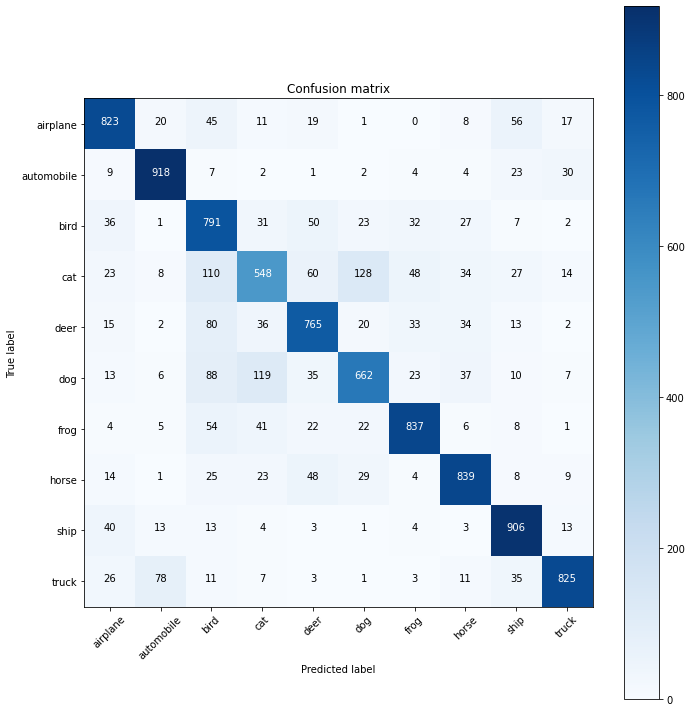

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_list.type(torch.IntTensor), output_list.argmax(dim=1))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, dataset_test.classes,ternary_image=True)

Normal image
[[887   9  27   8   5   4   7   3  38  12]
 [  5 940   4   1   0   2   3   1  15  29]
 [ 46   0 814  31  38  30  20  14   5   2]
 [ 22   5  61 672  48 127  26  17  12  10]
 [  9   1  43  35 843  16  20  27   1   5]
 [  5   2  39 101  31 777  15  24   3   3]
 [  3   4  42  43  22  17 863   3   1   2]
 [ 12   1  23  18  39  34   2 867   0   4]
 [ 37   7   7   7   1   0   5   2 925   9]
 [ 21  55   7   8   1   1   2   4  23 878]]


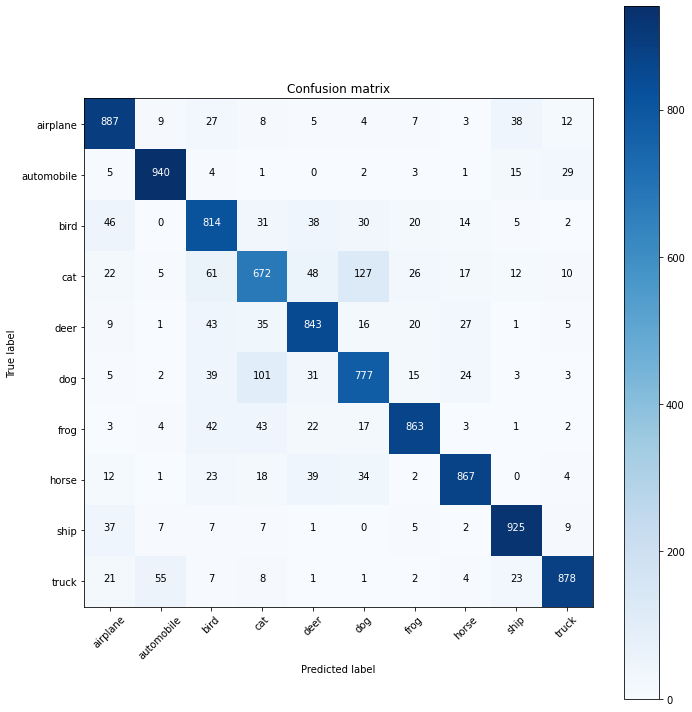

In [27]:
cm2 = confusion_matrix(target_list2.type(torch.IntTensor), output_list2.argmax(dim=1))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm2, dataset_test.classes)

In [147]:
error_dict = {'airplane':0,
        'automobile':0,
        'bird':0,
        'cat':0,
        'deer':0,
        'dog':0,
        'frog':0,
        'horse':0,
        'ship':0,
        'truck':0  
}
for i in range(10):
    error = cm2[i][i]-cm[i][i]
    error_dict[dicti[i]]=error

In [148]:
error_dict

{'airplane': -60,
 'automobile': 130,
 'bird': -25,
 'cat': 113,
 'deer': 135,
 'dog': 6,
 'frog': 68,
 'horse': 97,
 'ship': 8,
 'truck': 49}

## Plotting graph for tenrary images

In [14]:
import tqdm
dataset_list = torch.tensor([])
dataset_ternary_list = torch.tensor([])
target_list = torch.tensor([])


with torch.no_grad():
#     for images, labels in tqdm.tqdm(testloader):
#         target_list = torch.cat(
#             (target_list, labels)
#             ,dim=0
#         )
#         dataset_list = torch.cat(
#             (dataset_list, images)
#             ,dim=0
#         )
#         images = TNT.image_tnt(images)
#         dataset_ternary_list = torch.cat(
#             (dataset_ternary_list, images)
#             ,dim=0
#         )

    for images, labels in tqdm.tqdm(testloader):
        bird = np.where(labels == 2)
        cat = np.where(labels == 3)
        dog = np.where(labels == 5)

        target_list = torch.cat(
            (target_list, labels[cat])#,labels[cat],labels[dog])
            ,dim=0
        )
        dataset_list = torch.cat(
            (dataset_list, images[cat])#,images[cat],images[dog])
            ,dim=0
        )
        images = TNT.image_tnt(images)
        dataset_ternary_list = torch.cat(
            (dataset_ternary_list, images[cat])#,images[cat],images[dog])
            ,dim=0
        )



  3%|██                                                                                 | 2/79 [00:00<00:05, 14.49it/s]

tensor([[[ 1.9270,  1.9270,  1.9270,  ...,  1.9270,  1.9270,  1.9270],
         [ 1.9270,  1.9270,  1.9270,  ...,  1.9270,  1.9270,  1.9270],
         [ 1.9270,  1.9270,  1.9270,  ...,  1.9270,  1.9270,  1.9270],
         ...,
         [ 0.0000, -1.9270, -1.9270,  ...,  0.0000,  1.9270,  1.9270],
         [ 0.0000, -1.9270, -1.9270,  ...,  1.9270,  1.9270,  1.9270],
         [ 0.0000, -1.9270, -1.9270,  ...,  0.0000,  1.9270,  1.9270]],

        [[ 1.9965,  1.9965,  1.9965,  ...,  1.9965,  1.9965,  1.9965],
         [ 1.9965,  1.9965,  1.9965,  ...,  1.9965,  1.9965,  1.9965],
         [ 1.9965,  1.9965,  1.9965,  ...,  1.9965,  1.9965,  1.9965],
         ...,
         [ 0.0000, -1.9965, -1.9965,  ...,  1.9965,  1.9965,  1.9965],
         [ 0.0000, -1.9965, -1.9965,  ...,  1.9965,  1.9965,  1.9965],
         [ 0.0000,  0.0000, -1.9965,  ...,  1.9965,  1.9965,  1.9965]],

        [[ 2.1048,  2.1048,  2.1048,  ...,  2.1048,  2.1048,  2.1048],
         [ 2.1048,  2.1048,  2.1048,  ...,  2

  8%|██████▎                                                                            | 6/79 [00:00<00:04, 14.99it/s]

tensor([[[2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446],
         [2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446],
         [2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446],
         ...,
         [2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446],
         [2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446],
         [2.4446, 2.4446, 2.4446,  ..., 2.4446, 2.4446, 2.4446]],

        [[2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216],
         [2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216],
         [2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216],
         ...,
         [2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216],
         [2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216],
         [2.5216, 2.5216, 2.5216,  ..., 2.5216, 2.5216, 2.5216]],

        [[2.6761, 2.6761, 2.6761,  ..., 2.6761, 2.6761, 2.6761],
         [2.6761, 2.6761, 2.6761,  ..., 2.6761, 2.6761, 2.6761],
         [2.6761, 2.6761, 2.6761,  ..., 2.6761, 2.6761, 2.

 10%|████████▍                                                                          | 8/79 [00:00<00:04, 14.97it/s]

tensor([[[1.1653, 1.1653, 1.1653,  ..., 1.1653, 1.1653, 1.1653],
         [1.1653, 1.1653, 1.1653,  ..., 1.1653, 1.1653, 1.1653],
         [1.1653, 1.1653, 1.1653,  ..., 1.1653, 1.1653, 1.1653],
         ...,
         [1.1653, 1.1653, 1.1653,  ..., 0.0000, 0.0000, 0.0000],
         [1.1653, 1.1653, 1.1653,  ..., 0.0000, 0.0000, 0.0000],
         [1.1653, 1.1653, 1.1653,  ..., 1.1653, 1.1653, 1.1653]],

        [[1.4410, 1.4410, 1.4410,  ..., 1.4410, 1.4410, 1.4410],
         [1.4410, 1.4410, 1.4410,  ..., 1.4410, 1.4410, 1.4410],
         [1.4410, 1.4410, 1.4410,  ..., 1.4410, 1.4410, 1.4410],
         ...,
         [0.0000, 1.4410, 1.4410,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 1.4410, 1.4410,  ..., 0.0000, 0.0000, 1.4410],
         [0.0000, 0.0000, 1.4410,  ..., 1.4410, 1.4410, 1.4410]],

        [[1.8693, 1.8693, 1.8693,  ..., 1.8693, 1.8693, 1.8693],
         [1.8693, 1.8693, 1.8693,  ..., 1.8693, 1.8693, 1.8693],
         [1.8693, 1.8693, 1.8693,  ..., 1.8693, 1.8693, 1.

 15%|████████████▍                                                                     | 12/79 [00:00<00:04, 14.88it/s]

tensor([[[ 1.8191,  1.8191,  1.8191,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  1.8191,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.8191,  1.8191,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.8191, -1.8191, -1.8191,  ..., -1.8191, -1.8191, -1.8191],
         [-1.8191, -1.8191, -1.8191,  ..., -1.8191, -1.8191, -1.8191],
         [-1.8191, -1.8191, -1.8191,  ..., -1.8191, -1.8191, -1.8191]],

        [[ 1.6608,  1.6608,  1.6608,  ...,  1.6608,  1.6608,  1.6608],
         [ 1.6608,  1.6608,  1.6608,  ...,  0.0000,  0.0000,  1.6608],
         [ 1.6608,  1.6608,  1.6608,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.6608, -1.6608, -1.6608,  ..., -1.6608, -1.6608, -1.6608],
         [-1.6608, -1.6608, -1.6608,  ..., -1.6608, -1.6608, -1.6608],
         [-1.6608, -1.6608, -1.6608,  ..., -1.6608, -1.6608, -1.6608]],

        [[ 1.7844,  1.7844,  1.7844,  ...,  1.7844,  1.7844,  1.7844],
         [ 1.7844,  1.7844,  1.7844,  ...,  1

 20%|████████████████▌                                                                 | 16/79 [00:01<00:04, 15.01it/s]

tensor([[[-1.0490, -1.0490, -1.0490,  ..., -1.0490, -1.0490, -1.0490],
         [-1.0490, -1.0490, -1.0490,  ..., -1.0490, -1.0490, -1.0490],
         [-1.0490, -1.0490, -1.0490,  ..., -1.0490, -1.0490, -1.0490],
         ...,
         [ 0.0000, -1.0490, -1.0490,  ..., -1.0490, -1.0490, -1.0490],
         [ 0.0000, -1.0490, -1.0490,  ..., -1.0490, -1.0490,  0.0000],
         [-1.0490, -1.0490, -1.0490,  ..., -1.0490, -1.0490,  0.0000]],

        [[ 0.0000, -1.0682, -1.0682,  ..., -1.0682, -1.0682, -1.0682],
         [ 0.0000, -1.0682,  0.0000,  ..., -1.0682, -1.0682, -1.0682],
         [ 0.0000, -1.0682, -1.0682,  ..., -1.0682, -1.0682, -1.0682],
         ...,
         [ 1.0682,  0.0000,  0.0000,  ..., -1.0682,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.0682,  0.0000,  1.0682],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-1.3683, -1.3683, -1.3683,  ..., -1.3683, -1.3683, -1.3683],
         [-1.3683, -1.3683, -1.3683,  ..., -1

 25%|████████████████████▊                                                             | 20/79 [00:01<00:04, 14.65it/s]

tensor([[[-1.2003, -1.2003, -1.2003,  ..., -1.2003, -1.2003, -1.2003],
         [-1.2003, -1.2003, -1.2003,  ..., -1.2003, -1.2003, -1.2003],
         [-1.2003, -1.2003,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  1.2003,  0.0000,  ...,  1.2003,  1.2003,  1.2003],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.2003,  1.2003,  1.2003],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.2003,  1.2003,  1.2003]],

        [[-1.2727, -1.2727, -1.2727,  ..., -1.2727, -1.2727, -1.2727],
         [-1.2727, -1.2727, -1.2727,  ..., -1.2727, -1.2727, -1.2727],
         [-1.2727, -1.2727, -1.2727,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-1.2608, -1.2608, -1.2608,  ..., -1.2608, -1.2608, -1.2608],
         [-1.2608, -1.2608, -1.2608,  ..., -1

 30%|████████████████████████▉                                                         | 24/79 [00:01<00:03, 14.42it/s]

tensor([[[ 0.8738,  0.8738,  0.8738,  ..., -0.8738,  0.0000,  0.0000],
         [ 0.0000,  0.8738,  0.8738,  ..., -0.8738, -0.8738,  0.8738],
         [ 0.0000,  0.8738,  0.8738,  ..., -0.8738, -0.8738,  0.0000],
         ...,
         [ 0.8738,  0.8738,  0.8738,  ...,  0.8738,  0.8738,  0.0000],
         [ 0.8738,  0.8738,  0.8738,  ...,  0.8738,  0.8738,  0.8738],
         [ 0.8738,  0.8738,  0.8738,  ...,  0.8738,  0.8738,  0.8738]],

        [[ 1.0007,  1.0007,  1.0007,  ..., -1.0007,  0.0000,  0.0000],
         [ 0.0000,  1.0007,  1.0007,  ..., -1.0007, -1.0007,  0.0000],
         [ 0.0000,  1.0007,  1.0007,  ..., -1.0007, -1.0007,  0.0000],
         ...,
         [ 1.0007,  1.0007,  1.0007,  ...,  1.0007,  1.0007,  1.0007],
         [ 1.0007,  1.0007,  1.0007,  ...,  1.0007,  1.0007,  1.0007],
         [ 1.0007,  1.0007,  1.0007,  ...,  1.0007,  1.0007,  1.0007]],

        [[ 1.2746,  1.2746,  1.2746,  ..., -1.2746,  0.0000,  1.2746],
         [ 0.0000,  1.2746,  1.2746,  ..., -1

 33%|██████████████████████████▉                                                       | 26/79 [00:01<00:03, 14.35it/s]

tensor([[[-1.3531, -1.3531, -1.3531,  ...,  1.3531,  1.3531,  1.3531],
         [-1.3531, -1.3531, -1.3531,  ...,  1.3531,  1.3531,  1.3531],
         [-1.3531, -1.3531, -1.3531,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.3531, -1.3531, -1.3531,  ...,  0.0000,  1.3531,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.3531,  1.3531,  1.3531],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.3531,  1.3531,  1.3531]],

        [[-1.3315, -1.3315, -1.3315,  ...,  0.0000,  0.0000,  0.0000],
         [-1.3315, -1.3315, -1.3315,  ...,  1.3315,  1.3315,  1.3315],
         [-1.3315, -1.3315, -1.3315,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.3315, -1.3315, -1.3315,  ...,  0.0000,  1.3315,  1.3315],
         [ 0.0000,  0.0000, -1.3315,  ...,  1.3315,  1.3315,  1.3315],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.3315,  1.3315,  1.3315]],

        [[ 0.0000,  0.0000, -1.3425,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -1.3425,  ...,  1

 38%|███████████████████████████████▏                                                  | 30/79 [00:02<00:03, 14.23it/s]

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.9761,  0.0000, -0.9761,  ..., -0.9761, -0.9761, -0.9761],
         [-0.9761, -0.9761, -0.9761,  ..., -0.9761, -0.9761, -0.9761],
         [-0.9761, -0.9761, -0.9761,  ..., -0.9761, -0.9761, -0.9761]],

        [[ 0.7903,  0.7903,  0.7903,  ...,  0.7903,  0.7903,  0.7903],
         [ 0.7903,  0.7903,  0.7903,  ...,  0.7903,  0.7903,  0.7903],
         [ 0.7903,  0.7903,  0.7903,  ...,  0.7903,  0.7903,  0.7903],
         ...,
         [-0.7903,  0.0000, -0.7903,  ..., -0.7903, -0.7903, -0.7903],
         [-0.7903, -0.7903, -0.7903,  ..., -0.7903, -0.7903, -0.7903],
         [-0.7903, -0.7903, -0.7903,  ..., -0.7903, -0.7903, -0.7903]],

        [[ 1.3840,  1.3840,  1.3840,  ...,  1.3840,  1.3840,  1.3840],
         [ 1.3840,  1.3840,  1.3840,  ...,  1

 41%|█████████████████████████████████▏                                                | 32/79 [00:02<00:03, 14.16it/s]

tensor([[[-1.5274, -1.5274, -1.5274,  ..., -1.5274, -1.5274, -1.5274],
         [-1.5274, -1.5274, -1.5274,  ..., -1.5274, -1.5274, -1.5274],
         [-1.5274, -1.5274, -1.5274,  ..., -1.5274, -1.5274, -1.5274],
         ...,
         [ 1.5274,  1.5274,  1.5274,  ...,  1.5274,  1.5274,  1.5274],
         [ 1.5274,  1.5274,  1.5274,  ...,  1.5274,  1.5274,  1.5274],
         [ 1.5274,  1.5274,  1.5274,  ...,  1.5274,  1.5274,  1.5274]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 1.5841,  1.5841,  1.5841,  ...,  1.5841,  1.5841,  1.5841],
         [ 1.5841,  1.5841,  1.5841,  ...,  1.5841,  1.5841,  1.5841],
         [ 1.5841,  1.5841,  1.5841,  ...,  1.5841,  1.5841,  1.5841]],

        [[ 1.6365,  1.6365,  1.6365,  ...,  1.6365,  1.6365,  1.6365],
         [ 1.6365,  1.6365,  1.6365,  ...,  1

 46%|█████████████████████████████████████▎                                            | 36/79 [00:02<00:02, 14.40it/s]

tensor([[[-1.8621, -1.8621, -1.8621,  ...,  0.0000,  0.0000,  0.0000],
         [-1.8621, -1.8621,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

 48%|███████████████████████████████████████▍                                          | 38/79 [00:02<00:02, 14.49it/s]

tensor([[[2.0899, 2.0899, 2.0899,  ..., 2.0899, 2.0899, 2.0899],
         [2.0899, 2.0899, 2.0899,  ..., 2.0899, 2.0899, 2.0899],
         [2.0899, 2.0899, 2.0899,  ..., 2.0899, 2.0899, 2.0899],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[2.1616, 2.1616, 2.1616,  ..., 2.1616, 2.1616, 2.1616],
         [2.1616, 2.1616, 2.1616,  ..., 2.1616, 2.1616, 2.1616],
         [2.1616, 2.1616, 2.1616,  ..., 2.1616, 2.1616, 2.1616],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[2.2401, 2.2401, 2.2401,  ..., 2.2401, 2.2401, 2.2401],
         [2.2401, 2.2401, 2.2401,  ..., 2.2401, 2.2401, 2.2401],
         [2.2401, 2.2401, 2.2401,  ..., 2.2401, 2.2401, 2.

 53%|███████████████████████████████████████████▌                                      | 42/79 [00:02<00:02, 13.88it/s]

tensor([[[ 1.3560,  1.3560,  1.3560,  ...,  1.3560,  1.3560,  1.3560],
         [ 1.3560,  1.3560,  1.3560,  ...,  1.3560,  1.3560,  1.3560],
         [ 1.3560,  1.3560,  1.3560,  ...,  1.3560,  1.3560,  1.3560],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3560,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3560, -1.3560,  0.0000],
         [ 0.0000, -1.3560,  0.0000,  ..., -1.3560, -1.3560, -1.3560]],

        [[ 1.3835,  1.3835,  1.3835,  ...,  1.3835,  1.3835,  1.3835],
         [ 1.3835,  1.3835,  1.3835,  ...,  1.3835,  1.3835,  1.3835],
         [ 1.3835,  1.3835,  1.3835,  ...,  1.3835,  1.3835,  1.3835],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3835,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3835,  0.0000,  0.0000],
         [ 0.0000, -1.3835,  0.0000,  ..., -1.3835, -1.3835, -1.3835]],

        [[ 1.5441,  1.5441,  1.5441,  ...,  1.5441,  1.5441,  1.5441],
         [ 1.5441,  1.5441,  1.5441,  ...,  1

 56%|█████████████████████████████████████████████▋                                    | 44/79 [00:03<00:02, 13.97it/s]

tensor([[[-1.2781, -1.2781, -1.2781,  ..., -1.2781, -1.2781,  0.0000],
         [-1.2781, -1.2781, -1.2781,  ..., -1.2781, -1.2781, -1.2781],
         [-1.2781, -1.2781, -1.2781,  ..., -1.2781, -1.2781, -1.2781],
         ...,
         [-1.2781, -1.2781, -1.2781,  ..., -1.2781, -1.2781, -1.2781],
         [ 0.0000, -1.2781, -1.2781,  ..., -1.2781, -1.2781, -1.2781],
         [-1.2781, -1.2781, -1.2781,  ..., -1.2781, -1.2781, -1.2781]],

        [[-1.1234, -1.1234, -1.1234,  ..., -1.1234, -1.1234,  0.0000],
         [-1.1234, -1.1234, -1.1234,  ..., -1.1234, -1.1234,  0.0000],
         [-1.1234, -1.1234, -1.1234,  ..., -1.1234, -1.1234, -1.1234],
         ...,
         [-1.1234, -1.1234, -1.1234,  ..., -1.1234, -1.1234, -1.1234],
         [ 0.0000, -1.1234, -1.1234,  ..., -1.1234, -1.1234, -1.1234],
         [-1.1234, -1.1234, -1.1234,  ..., -1.1234, -1.1234, -1.1234]],

        [[-0.9456, -0.9456, -0.9456,  ..., -0.9456, -0.9456,  0.0000],
         [-0.9456, -0.9456, -0.9456,  ..., -0

 61%|█████████████████████████████████████████████████▊                                | 48/79 [00:03<00:02, 14.16it/s]

tensor([[[ 0.9953,  0.9953,  0.9953,  ...,  0.0000,  0.9953,  0.0000],
         [ 0.9953,  0.9953,  0.0000,  ...,  0.0000,  0.9953,  0.0000],
         [ 0.9953,  0.9953,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.9953,  0.9953,  0.9953,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.9953,  0.9953,  0.9953,  ...,  0.0000, -0.9953, -0.9953],
         [ 0.9953,  0.9953,  0.9953,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 1.1597,  1.1597,  1.1597,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.1597,  1.1597,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.1597,  1.1597,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  1.1597,  1.1597,  ...,  0.0000, -1.1597, -1.1597],
         [ 1.1597,  1.1597,  1.1597,  ...,  0.0000, -1.1597, -1.1597],
         [ 1.1597,  0.0000,  0.0000,  ...,  0.0000, -1.1597, -1.1597]],

        [[ 0.9708,  0.9708,  0.9708,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.9708,  0.9708,  0.9708,  ...,  0

 63%|███████████████████████████████████████████████████▉                              | 50/79 [00:03<00:02, 14.20it/s]

tensor([[[-1.9350, -1.9350, -1.9350,  ...,  0.0000,  0.0000,  0.0000],
         [-1.9350, -1.9350, -1.9350,  ...,  0.0000,  0.0000,  0.0000],
         [-1.9350, -1.9350, -1.9350,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.9350, -1.9350, -1.9350,  ..., -1.9350, -1.9350, -1.9350],
         [ 0.0000,  0.0000, -1.9350,  ..., -1.9350, -1.9350, -1.9350],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.9350, -1.9350, -1.9350]],

        [[-1.9957, -1.9957, -1.9957,  ...,  0.0000,  0.0000,  0.0000],
         [-1.9957, -1.9957, -1.9957,  ...,  0.0000,  0.0000,  0.0000],
         [-1.9957, -1.9957, -1.9957,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-1.9957, -1.9957, -1.9957,  ..., -1.9957, -1.9957, -1.9957],
         [-1.9957, -1.9957, -1.9957,  ..., -1.9957, -1.9957, -1.9957],
         [ 0.0000,  0.0000, -1.9957,  ..., -1.9957, -1.9957, -1.9957]],

        [[-1.8247, -1.8247, -1.8247,  ...,  0.0000,  0.0000,  0.0000],
         [-1.8247, -1.8247, -1.8247,  ...,  0

 68%|████████████████████████████████████████████████████████                          | 54/79 [00:03<00:01, 14.30it/s]

tensor([[[-1.3663, -1.3663, -1.3663,  ..., -1.3663, -1.3663, -1.3663],
         [-1.3663, -1.3663, -1.3663,  ..., -1.3663, -1.3663, -1.3663],
         [-1.3663, -1.3663, -1.3663,  ..., -1.3663, -1.3663, -1.3663],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3663, -1.3663, -1.3663],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3663, -1.3663, -1.3663],
         [ 0.0000,  0.0000,  0.0000,  ..., -1.3663, -1.3663, -1.3663]],

        [[-1.5818, -1.5818, -1.5818,  ..., -1.5818, -1.5818,  0.0000],
         [-1.5818, -1.5818, -1.5818,  ...,  0.0000,  0.0000,  0.0000],
         [-1.5818, -1.5818, -1.5818,  ..., -1.5818,  0.0000,  0.0000],
         ...,
         [ 1.5818,  1.5818,  1.5818,  ..., -1.5818, -1.5818, -1.5818],
         [ 1.5818,  1.5818,  1.5818,  ..., -1.5818, -1.5818, -1.5818],
         [ 1.5818,  1.5818,  0.0000,  ..., -1.5818, -1.5818, -1.5818]],

        [[ 0.0000,  0.0000,  0.0000,  ..., -1.3926, -1.3926, -1.3926],
         [ 0.0000,  0.0000,  0.0000,  ..., -1

 73%|████████████████████████████████████████████████████████████▏                     | 58/79 [00:04<00:01, 14.45it/s]

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.8176,  0.8176,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.8176,  0.8176,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.8176, -0.8176, -0.8176,  ..., -0.8176, -0.8176, -0.8176],
         [-0.8176, -0.8176, -0.8176,  ..., -0.8176, -0.8176, -0.8176],
         [-0.8176, -0.8176, -0.8176,  ..., -0.8176, -0.8176, -0.8176]],

        [[ 0.0000,  0.7765,  0.7765,  ...,  0.7765,  0.7765,  0.0000],
         [ 0.7765,  0.7765,  0.7765,  ...,  0.7765,  0.7765,  0.0000],
         [ 0.0000,  0.7765,  0.7765,  ...,  0.7765,  0.7765,  0.0000],
         ...,
         [-0.7765, -0.7765, -0.7765,  ..., -0.7765, -0.7765, -0.7765],
         [-0.7765, -0.7765, -0.7765,  ..., -0.7765, -0.7765, -0.7765],
         [-0.7765, -0.7765, -0.7765,  ..., -0.7765, -0.7765, -0.7765]],

        [[ 1.5523,  1.5523,  1.5523,  ...,  1.5523,  1.5523,  1.5523],
         [ 1.5523,  1.5523,  1.5523,  ...,  1

 76%|██████████████████████████████████████████████████████████████▎                   | 60/79 [00:04<00:01, 14.15it/s]

tensor([[[-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727],
         [-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727],
         [-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727],
         ...,
         [-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727],
         [-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727],
         [-1.1727, -1.1727, -1.1727,  ..., -1.1727, -1.1727, -1.1727]],

        [[-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525],
         [-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525],
         [-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525],
         ...,
         [-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525],
         [-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525],
         [-0.8525, -0.8525, -0.8525,  ..., -0.8525, -0.8525, -0.8525]],

        [[-1.3653, -1.3653, -1.3653,  ..., -1.3653, -1.3653, -1.3653],
         [-1.3653, -1.3653, -1.3653,  ..., -1

 81%|██████████████████████████████████████████████████████████████████▍               | 64/79 [00:04<00:01, 13.88it/s]

tensor([[[-1.4413, -1.4413, -1.4413,  ...,  0.0000,  0.0000,  0.0000],
         [-1.4413, -1.4413, -1.4413,  ...,  0.0000,  0.0000,  0.0000],
         [-1.4413, -1.4413, -1.4413,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  1.4413,  0.0000,  ..., -1.4413, -1.4413, -1.4413],
         [ 1.4413,  1.4413,  1.4413,  ..., -1.4413, -1.4413, -1.4413],
         [ 1.4413,  1.4413,  1.4413,  ..., -1.4413, -1.4413, -1.4413]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.2579,  1.2579,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.2579,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -1.2579, -1.2579, -1.2579],
         [ 0.0000,  1.2579,  0.0000,  ..., -1.2579, -1.2579, -1.2579],
         [ 1.2579,  1.2579,  1.2579,  ..., -1.2579, -1.2579, -1.2579]],

        [[ 1.4552,  1.4552,  1.4552,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.4552,  1.4552,  1.4552,  ...,  0

 84%|████████████████████████████████████████████████████████████████████▌             | 66/79 [00:04<00:00, 13.94it/s]

tensor([[[ 1.6285,  1.6285,  1.6285,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.6285,  1.6285,  1.6285,  ..., -1.6285, -1.6285,  0.0000],
         [ 1.6285,  1.6285,  1.6285,  ..., -1.6285, -1.6285, -1.6285],
         ...,
         [-1.6285, -1.6285, -1.6285,  ..., -1.6285, -1.6285, -1.6285],
         [-1.6285, -1.6285, -1.6285,  ..., -1.6285, -1.6285, -1.6285],
         [-1.6285, -1.6285, -1.6285,  ..., -1.6285, -1.6285, -1.6285]],

        [[ 1.5546,  1.5546,  1.5546,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.5546,  1.5546,  1.5546,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.5546,  1.5546,  1.5546,  ..., -1.5546,  0.0000,  0.0000],
         ...,
         [-1.5546, -1.5546, -1.5546,  ..., -1.5546, -1.5546, -1.5546],
         [-1.5546, -1.5546, -1.5546,  ..., -1.5546, -1.5546, -1.5546],
         [-1.5546, -1.5546, -1.5546,  ..., -1.5546, -1.5546, -1.5546]],

        [[ 1.4947,  0.0000,  1.4947,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.4947,  0.0000,  1.4947,  ...,  0

 89%|████████████████████████████████████████████████████████████████████████▋         | 70/79 [00:04<00:00, 14.11it/s]

tensor([[[ 1.2667,  1.2667,  1.2667,  ...,  1.2667,  1.2667,  1.2667],
         [ 1.2667,  1.2667,  1.2667,  ...,  1.2667,  1.2667,  1.2667],
         [ 1.2667,  1.2667,  1.2667,  ...,  1.2667,  1.2667,  1.2667],
         ...,
         [ 1.2667,  0.0000,  1.2667,  ...,  1.2667,  1.2667,  1.2667],
         [ 1.2667,  0.0000,  0.0000,  ...,  1.2667,  1.2667,  1.2667],
         [ 1.2667,  1.2667,  0.0000,  ...,  1.2667,  1.2667,  1.2667]],

        [[ 1.3383,  1.3383,  1.3383,  ...,  1.3383,  1.3383,  1.3383],
         [ 1.3383,  1.3383,  1.3383,  ...,  1.3383,  1.3383,  1.3383],
         [ 1.3383,  1.3383,  1.3383,  ...,  1.3383,  1.3383,  1.3383],
         ...,
         [ 1.3383,  0.0000,  0.0000,  ...,  1.3383,  1.3383,  1.3383],
         [ 1.3383,  0.0000,  0.0000,  ...,  1.3383,  1.3383,  1.3383],
         [ 1.3383,  1.3383,  0.0000,  ...,  1.3383,  1.3383,  1.3383]],

        [[ 1.4760,  1.4760,  1.4760,  ...,  1.4760,  1.4760,  1.4760],
         [ 1.4760,  1.4760,  1.4760,  ...,  1

 91%|██████████████████████████████████████████████████████████████████████████▋       | 72/79 [00:05<00:00, 14.05it/s]

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.8986, -0.8986, -0.8986,  ..., -0.8986, -0.8986, -0.8986],
         [-0.8986, -0.8986, -0.8986,  ..., -0.8986, -0.8986, -0.8986],
         [-0.8986, -0.8986, -0.8986,  ..., -0.8986, -0.8986, -0.8986]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.8561,  0.8561,  0.8561],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.8561,  0.8561,  0.8561],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.8561,  0.8561,  0.8561],
         ...,
         [-0.8561, -0.8561, -0.8561,  ..., -0.8561, -0.8561, -0.8561],
         [-0.8561, -0.8561, -0.8561,  ..., -0.8561, -0.8561, -0.8561],
         [-0.8561, -0.8561, -0.8561,  ..., -0.8561, -0.8561, -0.8561]],

        [[ 1.1094,  1.1094,  1.1094,  ...,  1.1094,  1.1094,  1.1094],
         [ 1.1094,  1.1094,  1.1094,  ...,  1

 96%|██████████████████████████████████████████████████████████████████████████████▉   | 76/79 [00:05<00:00, 13.91it/s]

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  1.4313,  1.4313],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.4313,  1.4313,  1.4313],
         [ 0.0000,  0.0000,  0.0000,  ...,  1.4313,  1.4313,  1.4313],
         ...,
         [-1.4313, -1.4313, -1.4313,  ..., -1.4313,  0.0000,  0.0000],
         [-1.4313, -1.4313, -1.4313,  ..., -1.4313, -1.4313,  0.0000],
         [-1.4313, -1.4313, -1.4313,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  1.4302,  1.4302,  1.4302],
         [ 1.4302,  1.4302,  1.4302,  ...,  1.4302,  1.4302,  1.4302],
         [ 1.4302,  1.4302,  1.4302,  ...,  1.4302,  1.4302,  1.4302],
         ...,
         [-1.4302, -1.4302, -1.4302,  ..., -1.4302,  0.0000, -1.4302],
         [-1.4302, -1.4302, -1.4302,  ..., -1.4302, -1.4302, -1.4302],
         [-1.4302, -1.4302, -1.4302,  ..., -1.4302, -1.4302, -1.4302]],

        [[ 1.7643,  1.7643,  1.7643,  ...,  1.7643,  1.7643,  1.7643],
         [ 1.7643,  1.7643,  1.7643,  ...,  1

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:05<00:00, 14.39it/s]

tensor([[[ 0.8195,  0.8195,  0.8195,  ...,  0.8195,  0.8195,  0.8195],
         [ 0.8195,  0.8195,  0.8195,  ...,  0.8195,  0.8195,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.8195,  0.8195,  0.0000],
         ...,
         [-0.8195, -0.8195, -0.8195,  ...,  0.8195,  0.8195,  0.8195],
         [ 0.0000, -0.8195, -0.8195,  ...,  0.8195,  0.8195,  0.8195],
         [ 0.8195,  0.0000, -0.8195,  ...,  0.8195,  0.8195,  0.0000]],

        [[ 0.9358,  0.9358,  0.9358,  ...,  0.9358,  0.9358,  0.9358],
         [ 0.9358,  0.9358,  0.9358,  ...,  0.9358,  0.9358,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.9358,  0.9358,  0.0000],
         ...,
         [-0.9358, -0.9358, -0.9358,  ...,  0.9358,  0.9358,  0.0000],
         [ 0.0000, -0.9358, -0.9358,  ...,  0.9358,  0.9358,  0.9358],
         [ 0.9358,  0.0000, -0.9358,  ...,  0.9358,  0.9358,  0.0000]],

        [[ 0.9262,  0.9262,  0.9262,  ...,  0.9262,  0.9262,  0.9262],
         [ 0.9262,  0.9262,  0.0000,  ...,  0

In [16]:
dataset_list.shape

torch.Size([2000, 3, 32, 32])

In [15]:
target_list[np.where(target_list==3)] = 0
# target_list[np.where(target_list==3)] = 1
# target_list[np.where(target_list==5)] = 2
target_list2 = target_list + 1

target_list = torch.cat(
            (target_list, target_list2)
            ,dim=0
        )
dataset_list = torch.cat(
            (dataset_list, dataset_ternary_list)
            ,dim=0
        )

In [17]:
target_list.shape, dataset_list.shape

(torch.Size([2000]), torch.Size([2000, 3, 32, 32]))

In [18]:
# %pip install sklearn
# %pip install numba
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
#         showlegend=True, 
        marker=dict(
            size=5,
            color=target_list.type(torch.IntTensor), #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
#             color_discrete_sequence=["red", "blue", "green","purple","white","grey"],
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=800,height=800,legend_title_text = "Class")    
#     fig.update_layout(legend_title_text = "Class")
    fig.layout.template = 'plotly_dark'
    
    fig.show()


def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,                
        mode='markers',
        marker=dict(
            size=5,
            color=target_list.type(torch.IntTensor),                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=800,height=800)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

## PCA

In [19]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dataset_list.reshape(len(dataset_list),-1))
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


Duration: 0.2554483413696289 seconds


In [20]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [13]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

## TSNE

In [145]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(dataset_list.reshape(len(dataset_list),-1))
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 24.534738063812256 seconds


In [147]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [148]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

## Umap

In [150]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(dataset_list.reshape(len(dataset_list),-1))
print('Duration: {} seconds'.format(time.time() - start))

Duration: 12.76450228691101 seconds


In [151]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [152]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

## LDA

In [153]:
start = time.time()
X_LDA = LDA(n_components=3).fit_transform(dataset_list.reshape(len(dataset_list),-1),target_list.type(torch.IntTensor))
print('Duration: {} seconds'.format(time.time() - start))

Duration: 13.170849323272705 seconds


In [155]:
plot_2d(X_LDA[:, 0],X_LDA[:, 1])

In [156]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])

In [77]:
start = time.time()
X_LDA_t = LDA(n_components=3).fit_transform(dataset_ternary_list.permute(0,2,3,1).reshape(10000,-1),target_list.type(torch.IntTensor))
print('Duration: {} seconds'.format(time.time() - start))

Duration: 17.424991369247437 seconds


In [87]:
# plot_2d(X_LDA_t[:, 0],X_LDA[:, 1])

In [88]:
# plot_3d(X_LDA_t[:, 0],X_LDA[:, 1],X_LDA[:, 2])